In [85]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
from scripts.QC.GT_matrices import Genotypes, Pedigree

### load individual matrices

In [87]:
home = "home/nas/stripes_AIL_gg6a/stripes2rqtl"
samp_folder = os.listdir(home)
for i in samp_folder:
    print(os.listdir(os.path.join(home, i)))

['F2_empty_files', 'F2_empty_genotypes.txt', 'F2_gt_matrix_FilteredForBinsize1000000.csv']
['F10_empty_files', 'F10_empty_genotypes.txt', 'F10_gt_matrix_FilteredForBinsize1000000.csv']
['F6_empty_files', 'F6_empty_genotypes.txt', 'F6_gt_matrix_FilteredForBinsize1000000.csv']
['F8_empty_files', 'F8_empty_genotypes.txt', 'F8_gt_matrix_FilteredForBinsize1000000.csv']
['F13_empty_files', 'F13_empty_genotypes.txt', 'F13_gt_matrix_FilteredForBinsize1000000.csv']
['F3_empty_files', 'F3_empty_genotypes.txt', 'F3_gt_matrix_FilteredForBinsize1000000.csv']
['F11_empty_files', 'F11_empty_genotypes.txt', 'F11_gt_matrix_FilteredForBinsize1000000.csv']
['F5_empty_files', 'F5_empty_genotypes.txt', 'F5_gt_matrix_FilteredForBinsize1000000.csv']
['F7_empty_files', 'F7_empty_genotypes.txt', 'F7_gt_matrix_FilteredForBinsize1000000.csv']
['F14_empty_files', 'F14_empty_genotypes.txt', 'F14_gt_matrix_FilteredForBinsize1000000.csv']
['F9_empty_files', 'F9_empty_genotypes.txt', 'F9_gt_matrix_FilteredForBinsize1

In [88]:
initial_file = os.path.join(home, "F2","F2_gt_matrix_FilteredForBinsize1000000.csv" )
gt = Genotypes(gt_file=initial_file, pedigree_file="/home/tilman/nas/pedigree/AIL_pedigree_20190826.tsv")
#gt.add_genotypes(gt_file =os.path.join(home, "F3","F3_gt_matrix_FilteredForBinsize1000000.csv" ) )

In [89]:
for i in samp_folder:
    if not i=="F2":
        #print(len(gt.samples))
        gt.add_genotypes(gt_file=os.path.join(home, i, i+"_gt_matrix_FilteredForBinsize1000000.csv"))
        #print("loaded:")
        #print(os.path.join(home, i, i+"_gt_matrix_FilteredForBinsize1000000.csv"))
        #print(len(gt.samples))

you're appending new genotypes to a genotype matrix that might have been previously filtered. the filtering criteria are stored in self.subset 
you're appending new genotypes to a genotype matrix that might have been previously filtered. the filtering criteria are stored in self.subset 
you're appending new genotypes to a genotype matrix that might have been previously filtered. the filtering criteria are stored in self.subset 
you're appending new genotypes to a genotype matrix that might have been previously filtered. the filtering criteria are stored in self.subset 
you're appending new genotypes to a genotype matrix that might have been previously filtered. the filtering criteria are stored in self.subset 
you're appending new genotypes to a genotype matrix that might have been previously filtered. the filtering criteria are stored in self.subset 
you're appending new genotypes to a genotype matrix that might have been previously filtered. the filtering criteria are stored in self.

### processing

In [90]:
gt.order_matrices(all_mt=False)

In [38]:
gt.construct_density_bin_matrix(folder="/home/tilman/nas/stripes_AIL_gg6a/")

In [39]:
gt.order_matrices()

In [7]:
c = gt._fill_gaps(genotype_matrix=gt.gt_matrix, thresh=3)

In [8]:
gt.gt_matrix = c

In [ ]:
import copy
ms_gt = copy.deepcopy(gt)

In [ ]:
c.to_csv("./various_subsets/raw_geno_all_samples_fill3mbgaps.csv") # raw_data

In [ ]:
gt.gt_matrix

In [9]:
gt.get_congruency_matrix()

/home/tilman/nas/chicken_finemapping/QTL/stripes2rqtl_multigen/scripts/QC/GT_matrices.py:148: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  array = self.gt_matrix.loc[sample]


146314
0.5087937330118438
150214
0.09905660377358491
150314
0.2878464818763326
150414
0.7724288840262582
151014
0.7126436781609196
151814
0.6341948310139165
151914
0.7125506072874493
152014
0.7696969696969697
152214
0.7938144329896907
152314
0.7260869565217392
152614
0.14222222222222222
153014
0.7863247863247863
153814
0.7674418604651163
154014
0.8197064989517819
154614
0.5013404825737265
154814
0.7674418604651163
156114
0.06290672451193059
156314
0.71403482979146
156414
0.2927114194185515
156514
0.6161616161616161
156714
0.7276129686285936
156814
0.6593452945564497
156914
0.6795004315412478
157014
0.6010185672693973
157814
0.5431973170098386
157914
0.7003006253006253
158014
0.6822824161040889
158814
0.3384615384615385
159414
0.3879264584621728
159514
0.7569620253164557
160414
0.5541505062278569
169814
0.3474178403755869
126813
0.45762034086321735
126913
0.696145229102969
127013
0.5087937330118438
127513
0.6010185672693973
127913
0.09905660377358491
128013
0.643736178290291
128313
0.52

In [56]:
mean_cong_per_pos = gt.congruency_matrix.mean(axis=0)
mean_cong_per_ind = gt.congruency_matrix.mean(axis=1)

In [11]:
mean_cong_per_ind_no5 = gt.congruency_matrix[[i for i in gt.congruency_matrix.columns if not i.startswith("5-")]].mean(axis=1, skipna=True)

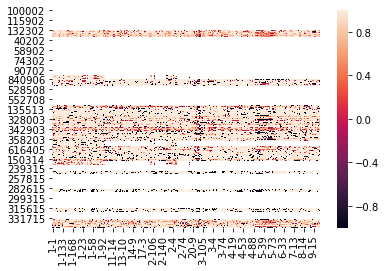

In [12]:
sns.heatmap(gt.congruency_matrix)

In [ ]:
gt.fill_in_parental_congruency()

In [13]:
gt.congruency_matrix.loc[[i for i in gt.congruency_matrix.index if i.endswith("02")]].isnull().sum().sum()

842043

In [ ]:
#gt.congruency_matrix.loc[[i for i in gt.congruency_matrix.index if i.endswith("02")]]

In [50]:
g = gt.congruency_matrix.fillna(0).mean(axis=0)

In [51]:
g

1-1     0.207532
1-2     0.159875
1-3     0.278285
1-4     0.255105
1-5     0.222439
          ...   
24-3    0.056495
24-4    0.059641
24-5    0.067467
24-6    0.059416
24-7    0.051988
Length: 1013, dtype: float64

In [57]:
mean_cong_per_pos

1-1     0.669930
1-2     0.589550
1-3     0.887088
1-4     0.771370
1-5     0.827247
          ...   
24-3    0.362827
24-4    0.383029
24-5    0.451308
24-6    0.379197
24-7    0.335292
Length: 1013, dtype: float64

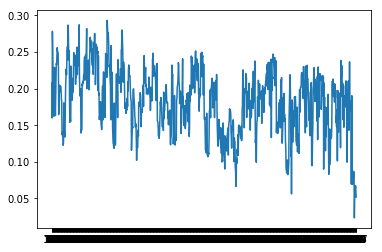

In [46]:
plt.plot(gt.congruency_matrix.fillna(0).mean(axis=0))
plt.show()

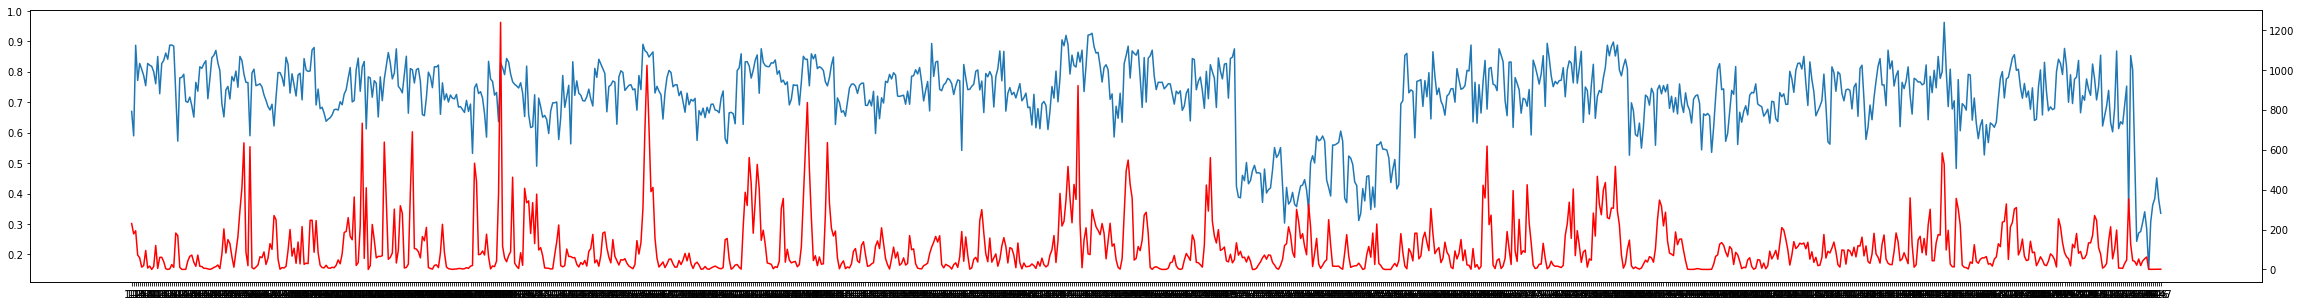

In [81]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(40,5))

ax.plot(mean_cong_per_pos)
ax2 = ax.twinx()
ax2.plot(gt.density_matrix.fillna(0).mean(axis=0), color="red")
#ax2.set_ylim(0,600)
plt.show()

 Unsurprisingly, the congruency for the sex chromosome doesnt work. i've changed the filtering to enable a skipping of chromosomes.

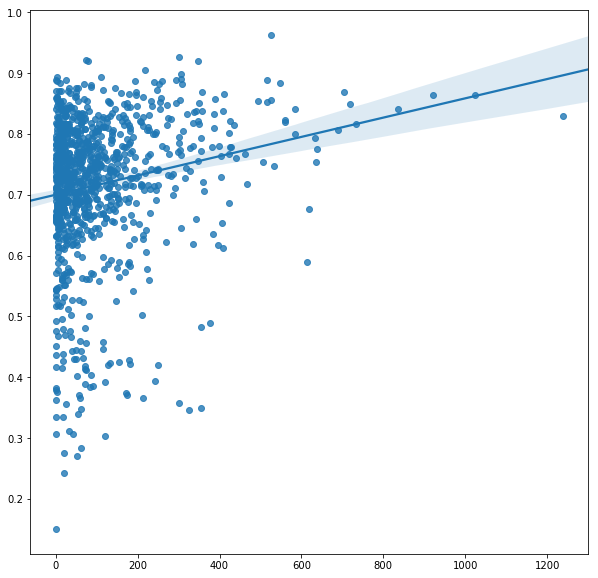

In [80]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))
sns.regplot(y=mean_cong_per_pos, x=gt.density_matrix.fillna(0).mean(axis=0), ax=ax)
plt.show()

In [66]:
long = gt.unstack_and_merge()

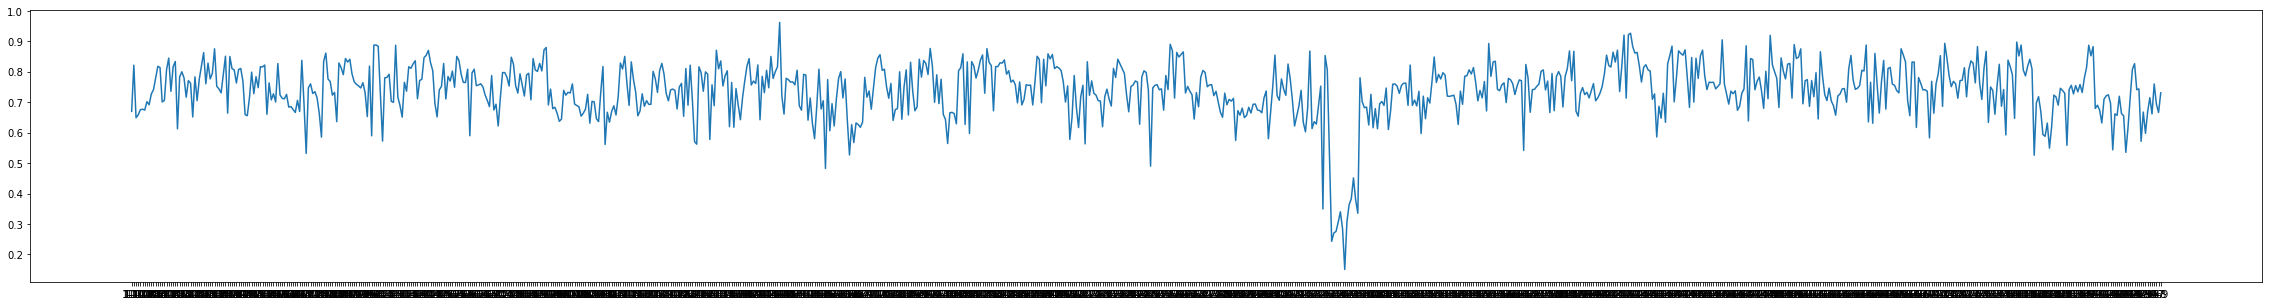

In [15]:
e =  mean_cong_per_pos.loc[[i for i in mean_cong_per_pos.index if not i.startswith("5-")]]
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(40,5))
ax.plot(e)
plt.show()

you can see that the dip that is missing here, is chromosome size 5, one of the sex chromosomes.
since this is broken by design, it should be the case for all samples and one just has to adjust the cutoff threshold.
however, since the congruency score is useless when both parents are heterozygous, this might skew things.
so i made an option to skip specific chromosomes for the congruency filters.

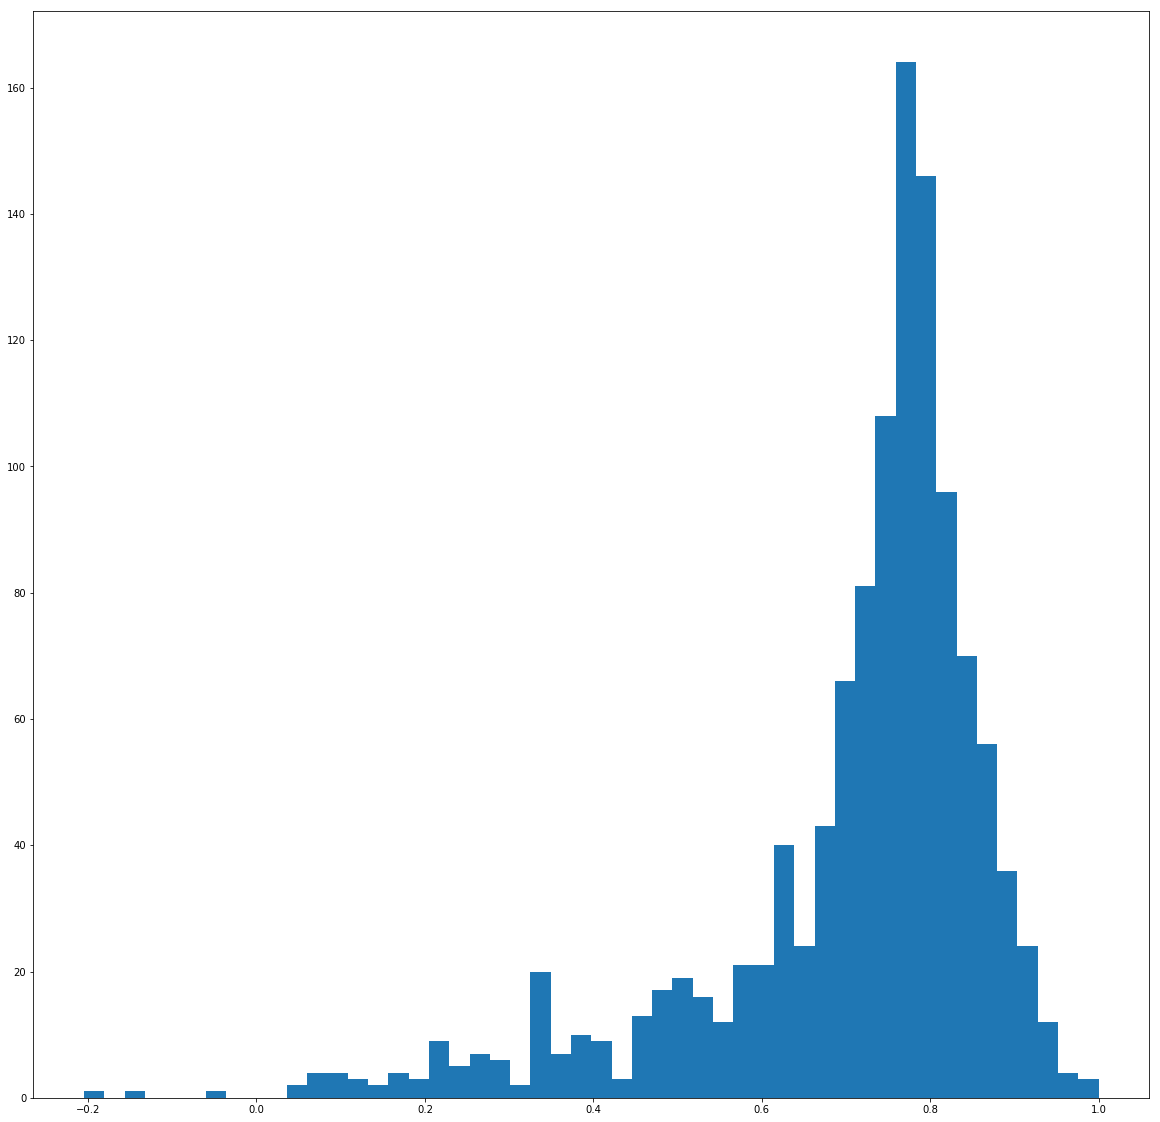

In [31]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,20))
ax.hist(mean_cong_per_ind, bins=50)
plt.show()

In [82]:
F2s = mean_cong_per_ind.loc[[i for i in mean_cong_per_ind.index if i.endswith("02")]]
F8s = mean_cong_per_ind.loc[[i for i in mean_cong_per_ind.index if i.endswith("08")]]
F15s = mean_cong_per_ind.loc[[i for i in mean_cong_per_ind.index if i.endswith("15")]]



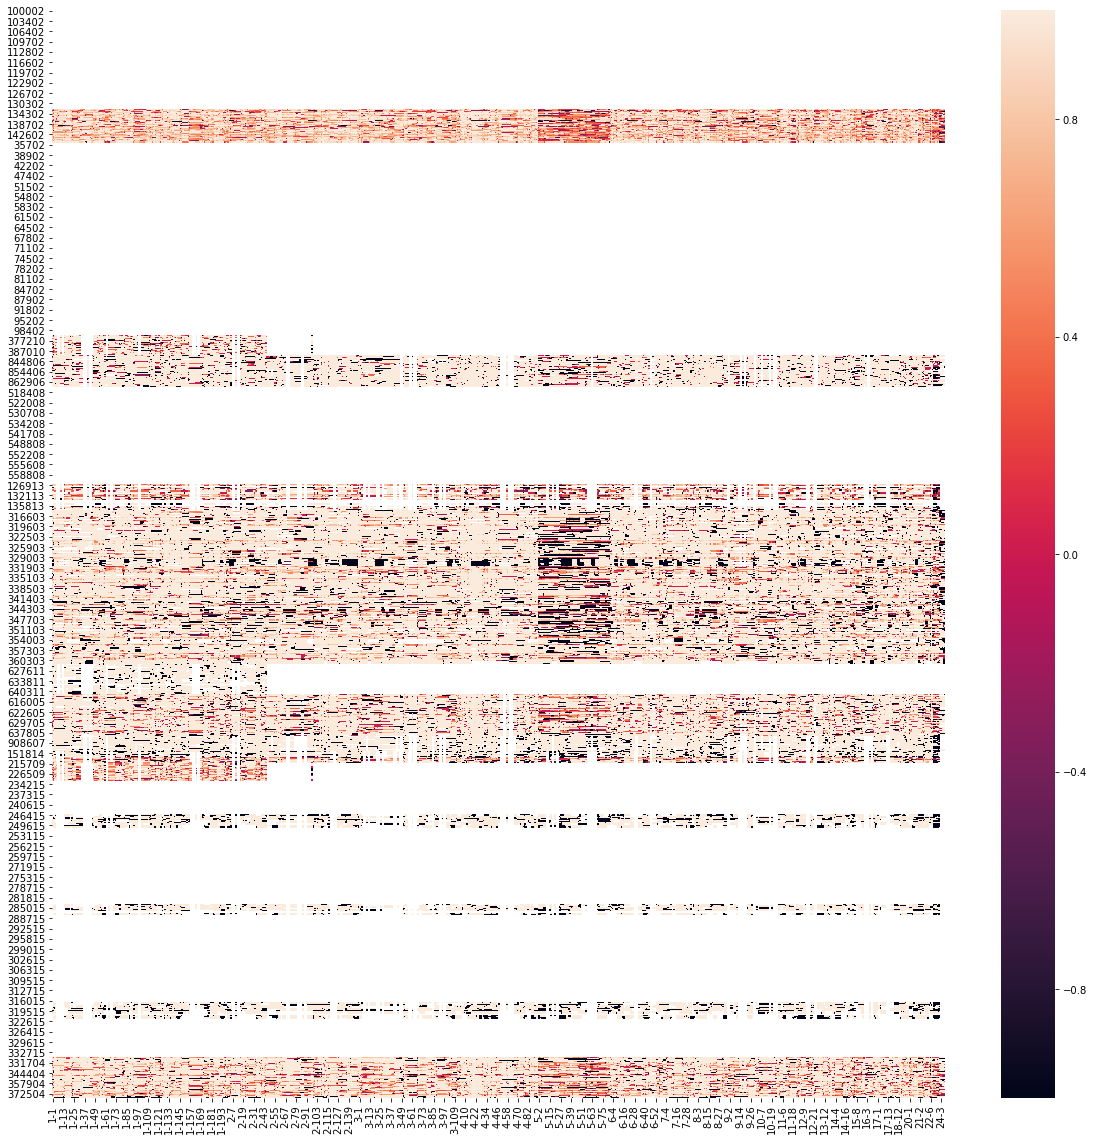

In [84]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,20))
sns.heatmap(gt.congruency_matrix, ax=ax)
plt.show()

In [23]:
len(F8s.isnull())

275

In [ ]:
mean_cong_per_ind

In [ ]:
len(F2s)
print(len(F2s.isnull()))

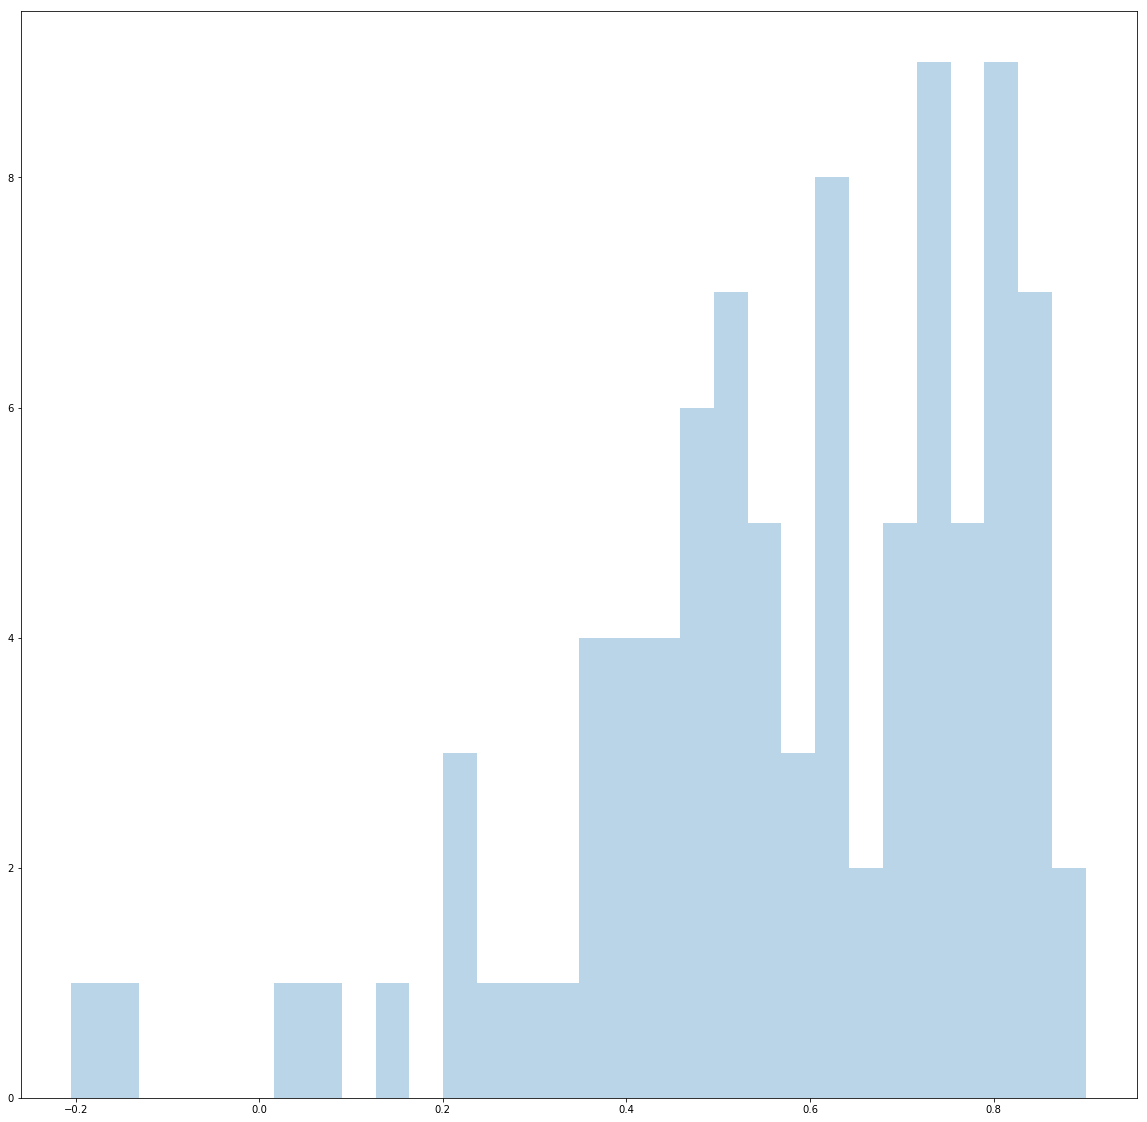

In [30]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,20))
#ax.hist(F2s, alpha=0.3, bins=30)
#ax.hist(F8s, alpha=0.3)
ax.hist(F15s, alpha=0.3, bins=30)

plt.show()

 congruency per individual. judging on this i might want to pull the filter down to 0.1 / 0.2 ? kind of trimodal, but i loose a significant fraction of individuals if i cut off at 0.55. 

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,20))
ax.hist(mean_cong_per_ind, bins=50, alpha=0.5)
ax.hist(mean_cong_per_ind_no5, bins=50, alpha=0.5)
plt.show()

well, not a significant difference, but oh, well :)

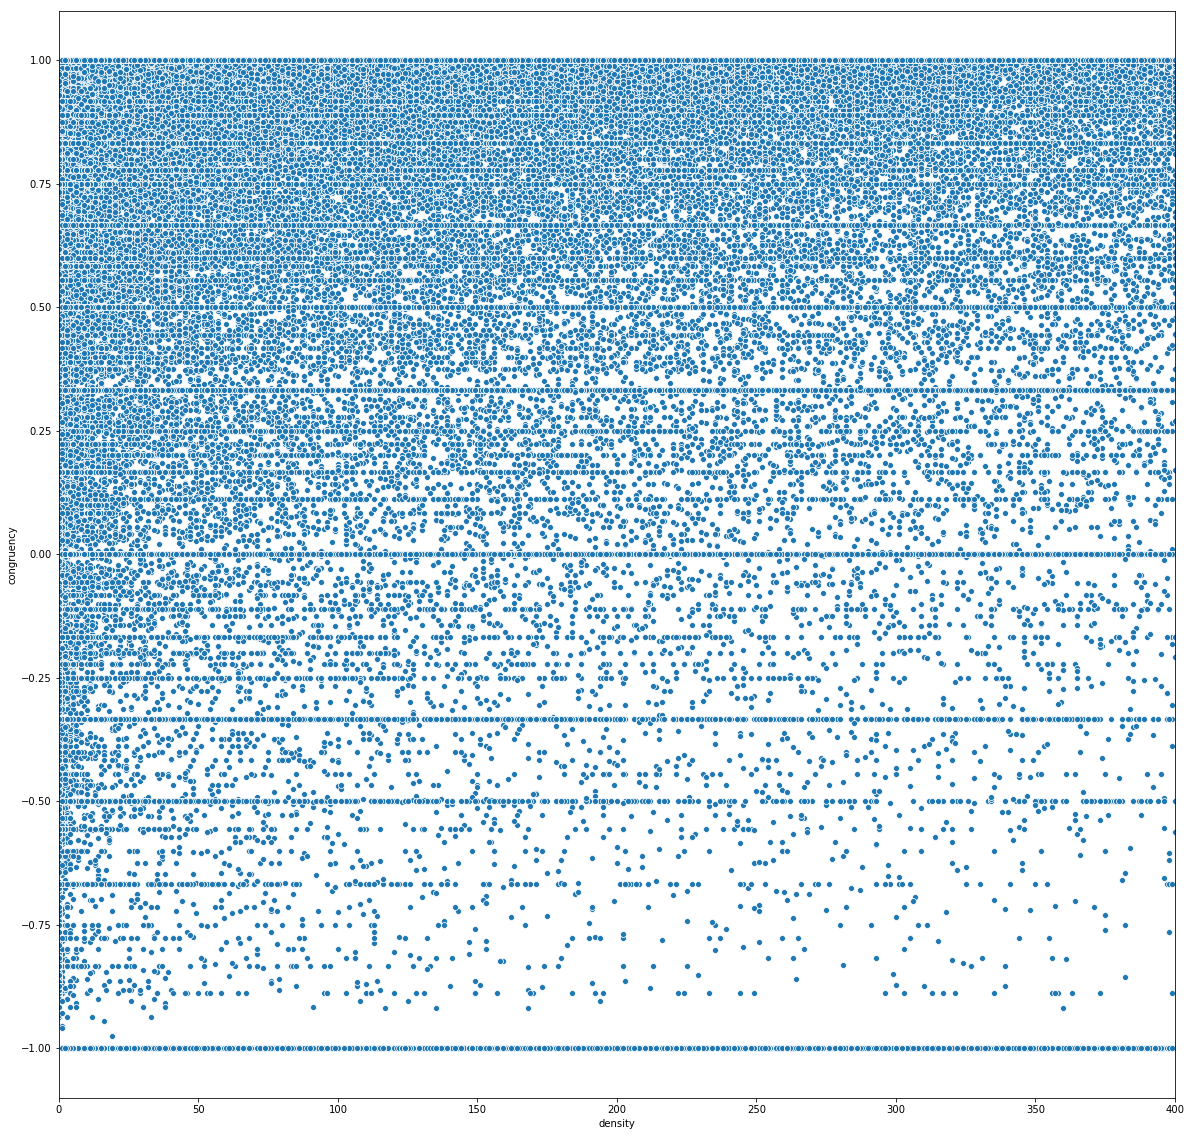

In [72]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,20))
sns.scatterplot(x="density", y="congruency", data=long, ax=ax)
ax.set_xlim(0,400)
plt.show()

In [75]:
#fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,20))
#sns.regplot(x="density", y="congruency", robust=True, data=long, ax=ax, scatter_kws={"alpha":0.2})
#ax.set_xlim(0,400)
#plt.show()

In [ ]:
gt.filter_by_parentage(cutoff_fraction=0.5, quality_threshold=0.15, skip_chr="5")

In [ ]:
#a = gt.apply_filters()

In [ ]:
c = gt.fill_gaps(thresh=3)

In [ ]:
len(c.dropna(how="all"))

In [ ]:
#c = gt._fill_gaps(genotype_matrix=gt.gt_matrix, thresh=3)

In [ ]:
gt.gt_matrix = c.fillna("NA")

In [ ]:
a = gt.apply_filters()

In [ ]:
a.to_csv("./various_subsets/all_samples_fill3mb_gaps_filter_cong015_05.csv")

In [ ]:
gt.xo_filter(thresh=3, strict=False)
a = gt.apply_filters()
gt.gt_matrix = a
gt.filters = []
a = gt.fill_gaps()

In [ ]:
a.to_csv("./various_subsets/all_samples_fill3mb_gaps_filter_cong015_05_all_filtered_for3mb.csv")

In [ ]:
gen_objs = {}
for k in samp_folder:
        #print(len(gt.samples))
        gen_objs[k]=Genotypes(gt_file=os.path.join(home, k, k+"_gt_matrix_FilteredForBinsize1000000.csv"))
        #print("loaded:")
        #print(os.path.join(home, i, i+"_gt_matrix_FilteredForBinsize1000000.csv"))
        #print(len(gt.samples))

In [ ]:
for i in ["F2", "F3", "F8", "F15"]:
    gen = gen_objs[i]
    c = gen.fill_gaps()
    print("before:", gen.gt_matrix.replace("NA", np.nan).isnull().sum().sum())
    print("after:", c.replace("NA", np.nan).isnull().sum().sum())
    print("saved {} genotypes".format(gen.gt_matrix.replace("NA", np.nan).isnull().sum().sum()-c.replace("NA", np.nan).isnull().sum().sum()))
    gen.gt_matrix = c
    gen.gt_matrix.to_csv("./various_subsets/{}_fill3mbgaps.csv".format(=i))
    gen.filter_by_parentage(cutoff_fraction=0.5, quality_threshold=0.15, skip_chr="5")
    a = gen.apply_filters()
    a.to_csv("./various_subsets/{}_fill3mb_gaps_filter_cong015_05.csv".format(i))
    gen.gt_matrix = a
    
    #print(len(gen_objs[i].gt_matrix))

### exporting to file 

In [ ]:
gt.gt_matrix.to_csv("full_matrix.csv")

### downstream processing

In [ ]:
from scripts.downstream_formatting import make_rqtl_input

In [ ]:
df = pd.read_csv("full_matrix.csv")

In [ ]:
df.index = df["Unnamed: 0"].astype(str)


In [ ]:
del(df["Unnamed: 0"])


In [ ]:
len(df)

In [ ]:
len(df.dropna(how="all"))

In [ ]:
def subset_pheno(infile, phe_cols, id_col):
    phedf = pd.read_csv(infile)
    return phedf

In [ ]:
d = subset_pheno(infile="/home/tilman/nas/all_phenotypes_f2f15_20190808.csv", phe_cols=["BW8"], id_col="ID")

In [ ]:
f = d[["ID", "BW8", "DAM","SIRE" ]]

In [ ]:
f.columns = ['id', 'BW8', 'DAM', 'SIRE']

In [ ]:
f.to_csv("full_pheno_subset.csv", index=False)

In [ ]:
make_rqtl_input(df=df, gen_out="geno_out_all_20190821.csv", phe_out="pheno_out_all_20190821.csv",old_id_pheno=False,phenotype="full_pheno_subset.csv", jitter=0.2, phe_id_col="id", phe_trait_col="BW8" )

In [ ]:
b = gt.apply_filters()

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,40))
sns.heatmap(gt.gt_matrix, ax=ax, cmap="viridis")
plt.show()

In [ ]:
gt.xo_filter(thresh=3, strict=True)

In [ ]:
a = gt.apply_filters()


In [ ]:
gt.filters = []

In [ ]:
gt.xo_filter(thresh=3, strict=False)

In [ ]:
b = gt.apply_filters()
gt.filters = []

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,40))
sns.heatmap(a, ax=ax, cmap="viridis")
plt.show()

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,40))
sns.heatmap(b, ax=ax, cmap="viridis")
plt.show()

In [ ]:
from copy import deepcopy

In [ ]:
c = gt._fill_gaps(genotype_matrix=gt.gt_matrix, thresh=3)

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,40))
sns.heatmap(c.replace("NA", np.nan), ax=ax, cmap="viridis")
plt.show()

In [ ]:
gt.gt_matrix = c

In [ ]:
gt.xo_filter(thresh=3, strict=False)

In [ ]:
gt.filters = []

In [ ]:
gt.filters = []

In [ ]:
a = gt.apply_filters()

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,40))
sns.heatmap(a.replace("NA", np.nan), ax=ax, cmap="viridis")
plt.show()

In [ ]:
c.sum().sum()

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,20))
sns.heatmap(a, ax=ax)
plt.show()

In [ ]:
#a = np.mean(gt.congruency_matrix, axis=1)


In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,20))
sns.heatmap(a, ax=ax)
plt.show()

In [ ]:
mlist = []
for f in gt.filters:
    mlist.append(f["mask"].astype(int))
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,40))
sns.heatmap(sum(mlist) ,ax=ax, vmax=1, cmap=["White","Black"])
plt.show()

In [ ]:
mlist = []
for f in gt.filters:
    mlist.append(f["mask"].astype(int))
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,40))
sns.heatmap(sum(mlist) ,ax=ax, vmax=1, cmap=["White","Black"])
plt.show()

In [ ]:
gt.pedigree.get_offspring("620505")

In [ ]:
gt.pedigree.get_parents("620505")

In [ ]:
dummy = ['863606', '863706', '863806','368704', '341304',"620505"]

In [ ]:
xo_mask = sum(mlist)

In [ ]:
chr1_dummy_mask = xo_mask.loc[dummy][[i for i in xo_mask.columns if i.startswith("1-")]]

In [ ]:
chr1_dummy_results = c.replace("NA", np.nan).loc[dummy][[i for i in c.columns if i.startswith("1-")]]

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, figsize=(40,7.5), sharex=True)
sns.heatmap(chr1_dummy_results, ax=ax1, cmap=["Red","Purple", "Blue"])
sns.heatmap(chr1_dummy_mask, ax=ax2, cmap=["White", "Black"])
sns.heatmap(chr1_dummy_results.mask(chr1_dummy_mask.astype(bool)), ax=ax3, cmap=["Red","Purple", "Blue"])

plt.tight_layout()
plt.show()

In [ ]:
from operator import itemgetter


In [ ]:
d = sorted(d,key=itemgetter(0))

In [ ]:

def fill_in_parental_congruency(self):
        """ fill in congruency scores for parents, using the mean congruency across their offspring.  """
        for sample in self.samples:
            ## fill in only empty arrays :
            if self.congruency_matrix.loc[[sample]].isnull().sum().sum() == len(self.congruency_matrix.loc[[sample]]):
                print(sample)
                offspring = self.pedigree.get_offspring(sample=sample)
                print(len(offspring))
                offspring = [i for i in offspring if i in self.gt_matrix.index]
                if not offspring == []:
                    offspring = self.pedigree.get_offspring(sample=sample)
                    print(offspring)
                    print(sample)
                    print(np.mean(test.congruency_matrix.loc[offspring].fillna(0), axis=0))
                    self.congruency_matrix.loc[sample]= np.mean(self.congruency_matrix.loc[offspring].fillna(0), axis=0)

In [ ]:
all_avail_gens = [[int(k),k] for k in set([i[-2:] for i in gt.samples])]
all_avail_gens = sorted(all_avail_gens,key=itemgetter(0))

In [ ]:
while len(all_avail_gens)>2:
    highest = all_avail_gens.pop()
    if  highest[0] - all_avail_gens[-1][0] == 1:
        for sample in [i for i in gt.samples if i.endswith(all_avail_gens[-1][1])]:
            #print(sample)
            offspring = gt.pedigree.get_offspring(sample=sample)
            #print("offspring are:")
            #print(len(offspring))
            offspring = [i for i in offspring if i in gt.gt_matrix.index]# only offspring that have genotypes
            #print("offspring with genotypes are:")
            #print(len(offspring))
            if not offspring == []:
                if gt.congruency_matrix.loc[[sample]].isnull().sum().sum() == len(gt.congruency_matrix.loc[[sample]]): # if sample previously had no data:
                    to_mean  = offspring
                else: 
                    to_mean = offspring + [sample]
            gt.congruency_matrix.loc[sample]= np.mean(gt.congruency_matrix.loc[to_mean].fillna(0), axis=0)
                
    else:
        print("parentals for {} are not present in the dataset".format(highest[0]))

In [ ]:
a = gt.pedigree.get_offspring("127113")

In [ ]:
gt.congruency_matrix.loc["127113"]